<a href="https://colab.research.google.com/github/kayrocsilva/am-fatec-2025-2/blob/main/CensusAm17_04_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install plotly --upgrade
!pip install squarify --upgrade

# Importação da Biblioteca

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
import pickle

# Carregamento do Database

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
base_census = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [58]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [59]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [61]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

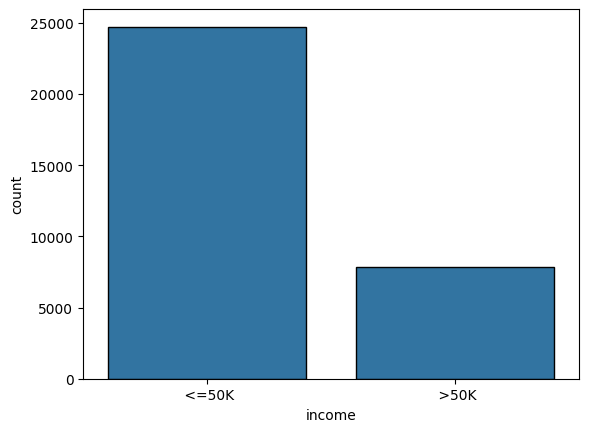

In [62]:
sns.countplot(x=base_census['income'], edgecolor = 'black');

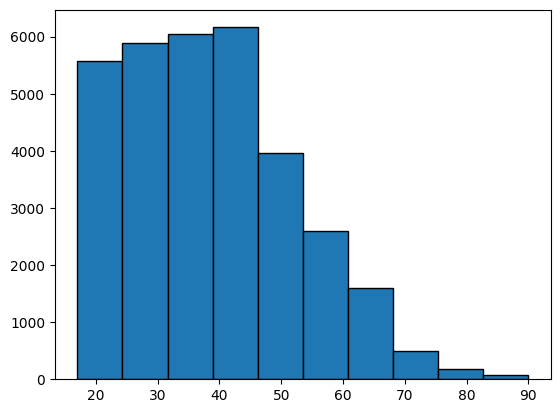

In [63]:
plt.hist(x = base_census['age'], edgecolor = 'black');

In [87]:
2472000/32561

75.91904425539757

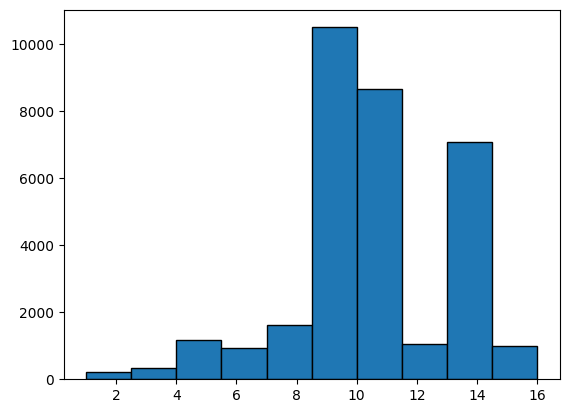

In [64]:
plt.hist(x = base_census['education-num'], edgecolor = 'black');

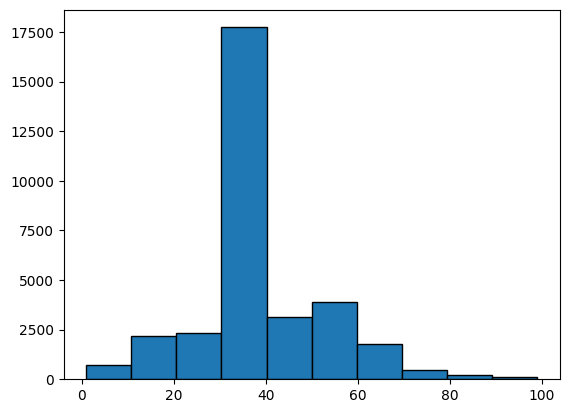

In [65]:
plt.hist(x = base_census['hour-per-week'], edgecolor = 'black');

In [66]:
profissao_idade = px.treemap(base_census, path=['workclass', 'age'])
profissao_idade.show()

In [67]:
ocupacao_relacao_idade = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
ocupacao_relacao_idade .show()

In [68]:
cordas_ocupacao_relacao = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
cordas_ocupacao_relacao.show()

In [69]:
cordas_profissao_ocupacao_renda = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
cordas_profissao_ocupacao_renda.show()

In [70]:
cordas_educacao_renda = px.parallel_categories(base_census, dimensions=['education', 'income'])
cordas_educacao_renda.show()

# Divisão de Previsores(Categoricos e Numericos) e Classes(Alvos/Resultantes)

In [71]:
base_census = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/census.csv')

In [72]:
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [73]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [74]:
Y_census = base_census.iloc[:, 14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento categorico

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()


In [77]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

## Tratamento OneHotEncoder

In [78]:
len(np.unique(base_census['workclass']))

9

In [79]:
len(np.unique(base_census['occupation']))

15

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [82]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [83]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [84]:
from sklearn.preprocessing import StandardScaler
scaler_census =  StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [85]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [86]:
from sklearn.model_selection import train_test_split

In [89]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, Y_census, test_size = 0.25, random_state = 0)

# Criando o Arquivo Binário

In [96]:
with open('/content/drive/MyDrive/am5t2/pickle/census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)